# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [55]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [56]:
weather = pd.read_csv("Outputs/weather_data.csv")
weather


,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,rawson,-43.3002,-65.1023,63.79,49,0,18.57,AR,1644204026
1,1,wukari,7.8500,9.7833,69.15,22,0,4.72,NG,1644204027
2,2,qaanaaq,77.4840,-69.3632,-11.67,59,29,7.25,GL,1644204027
3,3,cape town,-33.9258,18.4232,65.26,86,75,1.01,ZA,1644203943
4,4,mariveles,14.4833,120.4833,79.59,74,99,16.22,PH,1644204027
...,...,...,...,...,...,...,...,...,...,...
571,571,watertown,42.3709,-71.1828,25.07,85,0,0.00,US,1644204908
572,572,olutanga,7.3106,122.8464,82.18,70,91,8.61,PH,1644204909
573,573,bognor regis,50.7821,-0.6798,42.15,88,5,15.55,GB,1644204909
574,574,umm lajj,25.0213,37.2685,64.69,35,0,15.66,SA,1644204909


### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [57]:
gmaps.configure(api_key=g_key)

locations = weather[["Lat", "Lng"]].astype(float)

humidity = weather["Humidity"].astype(float)

In [58]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=humidity, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

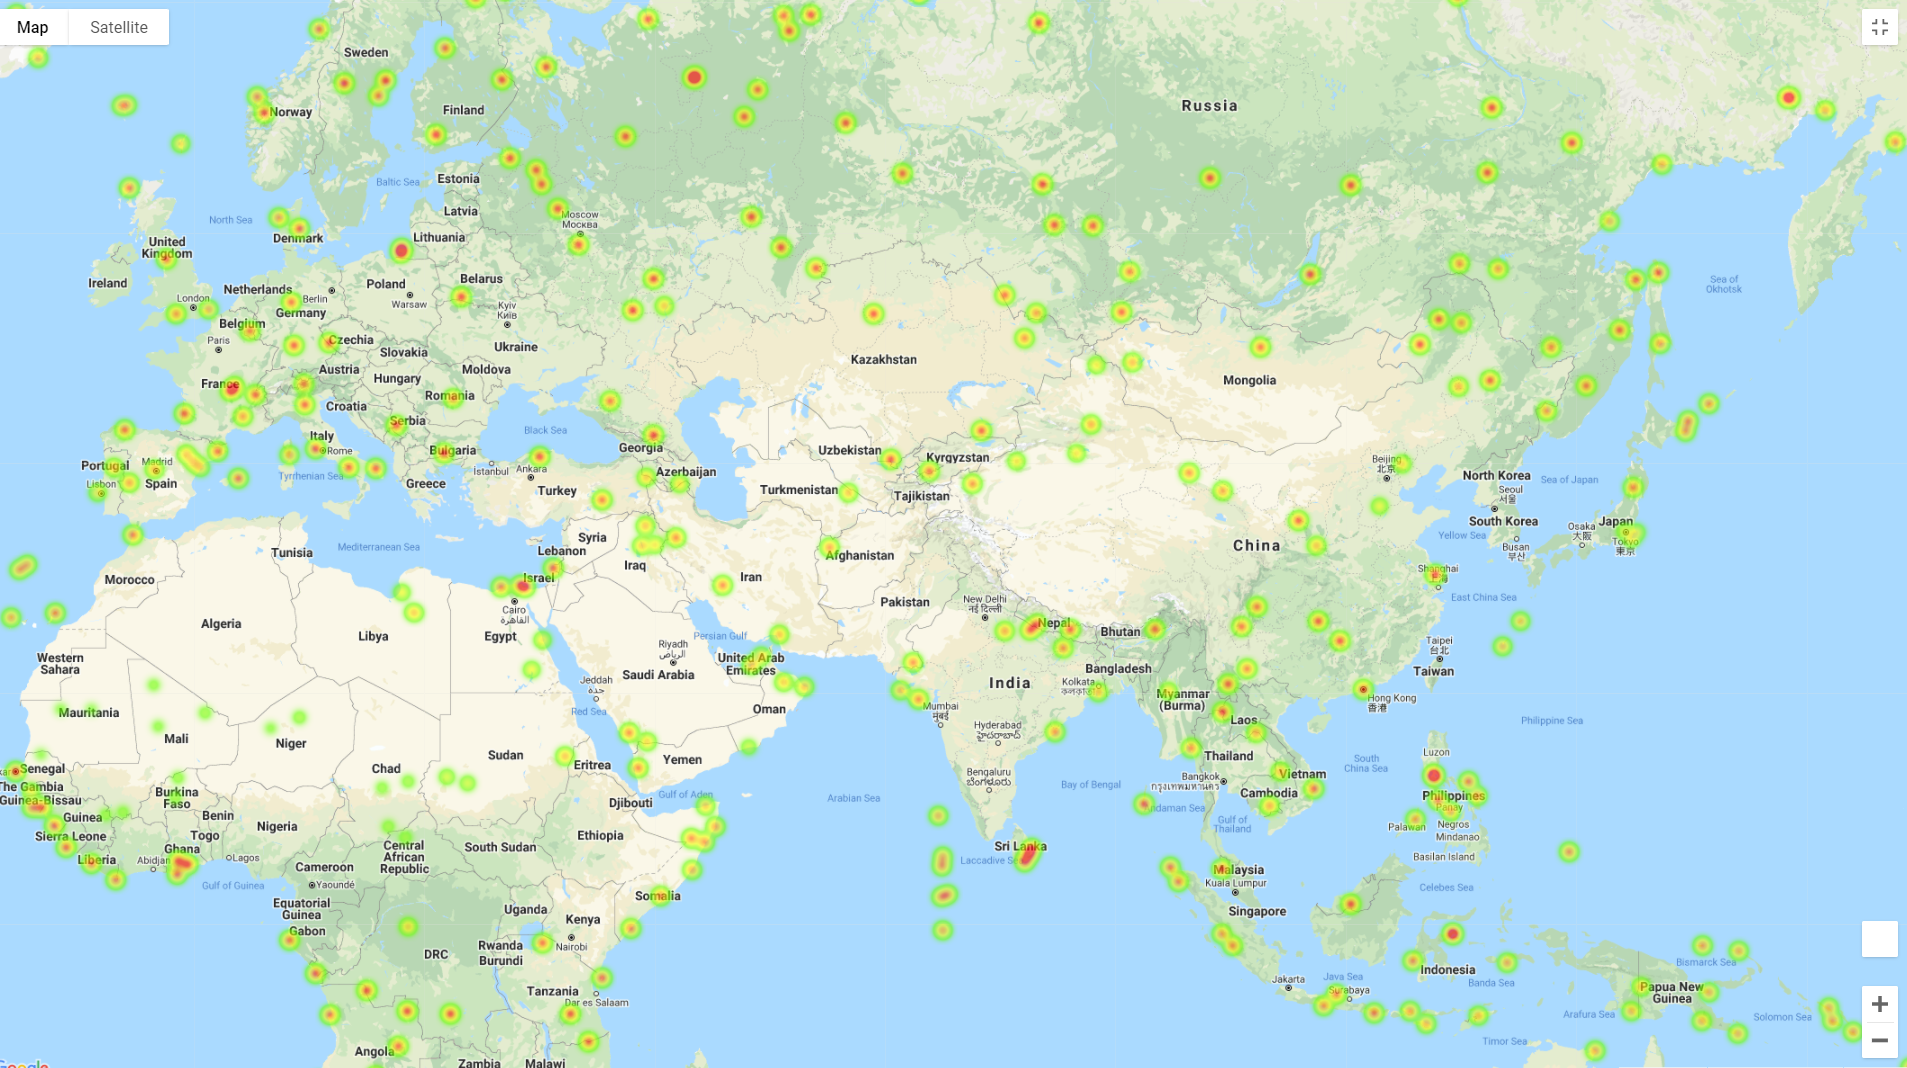

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [43]:
weather = weather[weather["Max Temp"] < 80]
weather = weather[weather["Max Temp"] > 70]
weather = weather[weather["Cloudiness"] == 0]
weather

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
103,103,salalah,17.0151,54.0924,73.49,25,0,17.27,OM,1644204168
125,125,port lincoln,-34.7333,135.8667,79.56,48,0,18.32,AU,1644204181
147,147,neuquen,-38.9516,-68.0591,75.27,19,0,10.94,AR,1644204022
228,228,cabanas,22.9758,-82.9219,70.27,76,0,9.04,CU,1644204332
245,245,arraial do cabo,-22.9661,-42.0278,75.36,92,0,18.75,BR,1644204396
249,249,east london,-33.0153,27.9116,70.74,94,0,4.61,ZA,1644203794
348,348,pochutla,15.7432,-96.4661,77.85,82,0,3.06,MX,1644204544
349,349,launceston,-41.4500,147.1667,79.61,42,0,4.00,AU,1644204545
403,403,saint-pierre,-21.3393,55.4781,78.44,78,0,5.75,RE,1644204621
530,530,joao camara,-5.5375,-35.8197,78.04,83,0,4.99,BR,1644204837


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [59]:
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
params = {
    "location": "17.0151, 54. 0924",
    "rankby": "distance",
    "type": "hotel",
    "key": g_key,
}

for index, row in weather.iterrows():

    # get restaurant type from df
    city = row['City']
    lat = row['Lat']
    lng = row ['Lng']
    
    # add keyword to params dict
    params['keyword'] = city
    params['location'] = lat, lng
    
    # assemble url and make API request
    response = requests.get(base_url, params=params).json()

    # extract results
    results = response['results']

    hotel_df.loc[index, 'name'] = results[0]['name']
    #hotel_df.loc[index, 'city'] = results[0]['vicinity']
    #hotel_df.loc[index, 'price_level'] = results[0]['price_level']
    #hotel_df.loc[index, 'rating'] = results[0]['rating']
    
hotel_df

IndexError: list index out of range

In [ ]:
# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]
locations = hotel_df[["Lat", "Lng"]]

In [ ]:
# Add marker layer ontop of heat map


# Display figure
